In [1]:
from pyasdf import ASDFDataSet
import numpy as np
import matplotlib.pyplot as plt
import time
wall_clock_start_time = time.perf_counter()
filename='UTC_20200706_071820.361.h5'
ds = ASDFDataSet(filename)
nc = len(ds.waveforms)
the_first_trace_in_the_file = next((x for x in ds.waveforms), None)
nt = len(the_first_trace_in_the_file.raw_data.merge()[0].data)
print('Loaded the H5 file in %f s'%(time.perf_counter()-wall_clock_start_time))

Loaded the H5 file in 0.060824 s


In [2]:
matrix = np.zeros((nc,nt))
for channel,i in zip(ds.waveforms,range(0,nc)):
    some_data = channel.raw_data
    matrix[i,:] = some_data.merge()[0].data
print('Put data in matrix in %f s'%(time.perf_counter()-wall_clock_start_time))

Put data in matrix in 36.765997 s


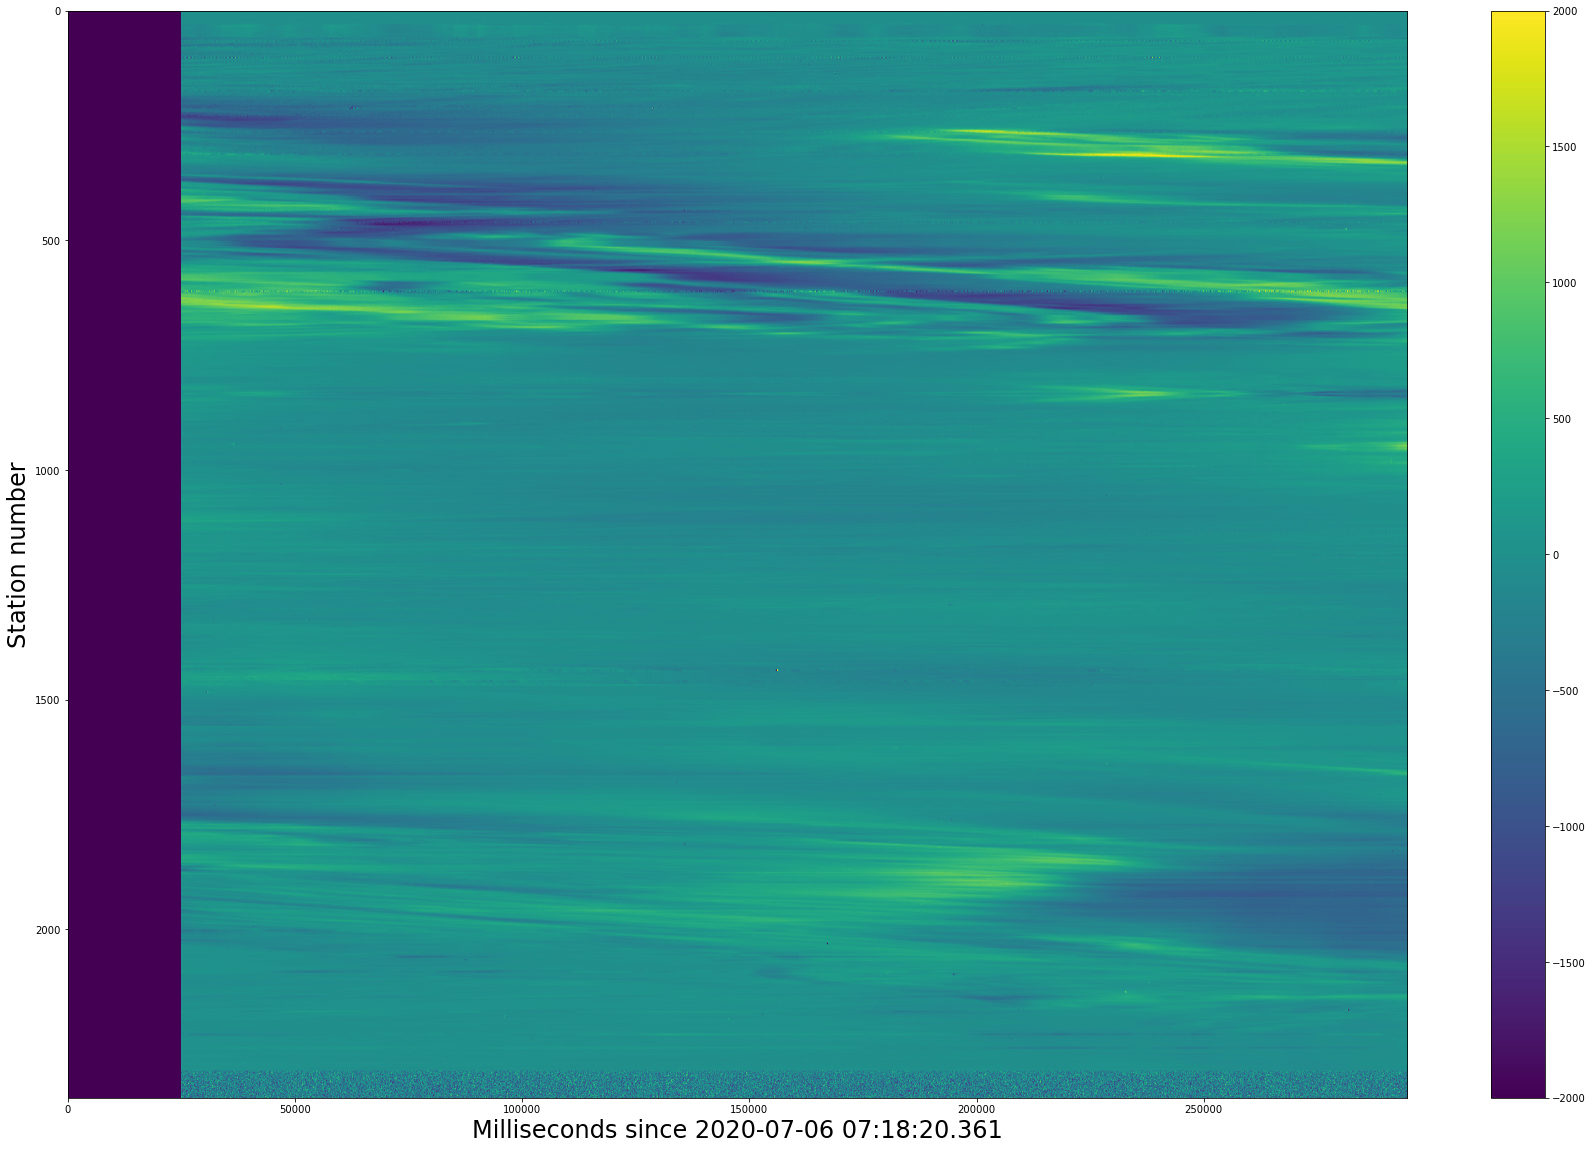

Plot created in 757.273622 s


In [4]:
fig,ax = plt.subplots(figsize=(30,20))
mat = ax.imshow(matrix, aspect='auto')
mat.set_clim(vmin = -2e3, vmax = 2e3) 
fig.colorbar(mat)
plt.xlabel('Milliseconds since 2020-07-06 07:18:20.361', fontsize=24)
plt.ylabel('Station number', fontsize=24)
plt.show()
fig.savefig(filename + '.png')
print('Plot created in %f s'%(time.perf_counter()-wall_clock_start_time))